# **Assignment 3 - NLP Project - Group 1 Wednesday Morning:**

---

# **Introduction**

---

Effective communication is a critical skill in professional settings, especially during job interviews. Candidates are often evaluated not just on the content of their responses but also on their delivery; grammar, tone, clarity, and overall professionalism. However, providing objective, consistent feedback on interview responses can be challenging for recruiters and job seekers alike.

.

**Why Smart Interview Assistance Matters**

Automated interview assistance tools can help candidates improve their speaking skills by providing constructive feedback on their responses. Such systems offer several key benefits:



*   **Objective Evaluation:** Eliminates human biases by offering consistent scoring criteria.

*   **Personalised Feedback:** Highlights individual strengths and areas for improvement.
*   **Skill Development:** Helps candidates refine their responses, improve articulation, and reduce filler word usage.
*   **Scalable Solution:** Enables large-scale interview preparation without the need for human reviewers.

.

**The Problem We Are Solving**

Job seekers often struggle with articulating professional responses in interviews. Common issues include:
*   Overuse of filler words (e.g., "um", "like", "you know").

*   Poor grammar and sentence structure.
*   Negative or uncertain tone.
*   Lack of vocabulary diversity.

.

**Proposed Solution**

Our Smart Interview Assistance project leverages Natural Language Processing (NLP) and machine learning to analyse interview responses and provide professionalism scores. The core steps include:

* **Data Preprocessing:** Cleaning and preparing textual data for analysis.

* **Feature Extraction:** Extracting linguistic features such as sentiment scores, lexical diversity, grammar issues, and filler word counts.

* **Model Training:** Using machine learning algorithms (e.g., Logistic Regression, Random Forest) to predict professionalism scores.

* **Evaluation & Feedback:** Assessing model performance and generating actionable feedback for users.


In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
# 1. Mount Google Drive to access files (if running in Colab)
from google.colab import drive
drive.mount('/content/drive')

# 2. Install necessary packages (uncomment if first run in Colab)
!pip install transformers tensorflow scikit-learn language-tool-python spacy textstat vaderSentiment
# System (Java 17) for language-tool-python
!apt-get update && apt-get install -y openjdk-17-jre-headless -qq

# 3. Standard imports
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.8 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu j

In [5]:
# 4. Load and preprocess dataset
# --------------------------------
df = pd.read_csv('/content/drive/MyDrive/RatedInterviewQuestionsDataset.csv')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

def preprocess_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r'[\n\r]+', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to original text
df['clean_answer'] = df['answer'].apply(preprocess_text)

# Display dataset shape and basic info
print(df.shape)
print(df.columns)
print(df.head(3))
print(df['professionalism_rating'].value_counts())

(200, 4)
Index(['question', 'answer', 'professionalism_rating', 'clean_answer'], dtype='object')
                                            question  \
0  How do you stay motivated during repetitive ta...   
1  What skills do you hope to develop in your nex...   
2  How do you deal with feedback that you disagre...   

                                              answer  professionalism_rating  \
0  Well, you know, repetitive tasks, they're just...                     0.0   
1  Well, that's a great question! Honestly, I hav...                     0.0   
2  When faced with conflict, I approach it calmly...                     1.0   

                                        clean_answer  
0  well you know repetitive tasks theyre justther...  
1  well thats a great question honestly i havent ...  
2  when faced with conflict i approach it calmly ...  
professionalism_rating
0.0    100
1.0    100
Name: count, dtype: int64


In [ ]:
# Update the list of available packages and their versions
!apt-get update

# Install OpenJDK 17 (Java Development Kit version 17) without asking for confirmation (-y flag)
!apt-get install -y openjdk-17-jdk

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [6]:
# 5. Extract handcrafted features (unchanged)
# -----------------------------------------------------------------------------
import nltk, spacy, language_tool_python, textstat
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Ensure models/data are available
try:
    nlp = spacy.load('en_core_web_sm')
except:
    spacy.cli.download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')

tool = language_tool_python.LanguageTool('en-US')
analyzer = SentimentIntensityAnalyzer()

filler_words = ["um", "uh", "like", "you know", "actually", "basically",
                "literally", "i mean", "hmm", "ah", "ok so"]

def extract_features(text: str) -> dict:
    orig = text
    clean = preprocess_text(text)
    # sentiment
    compound = analyzer.polarity_scores(orig)['compound']
    # lexical diversity
    toks = [w for w in clean.split() if w.isalpha()]
    lex_div = len(set(toks)) / len(toks) if toks else 0
    # grammar errors
    matches = tool.check(orig)
    gram_issues = len([m for m in matches if m.ruleId not in {"PUNCTUATION","WHITESPACE_RULE"}])
    # readability
    flesch = textstat.flesch_reading_ease(orig)
    # filler count
    filler_count = sum(len(re.findall(rf'\b{re.escape(f)}\b', clean)) for f in filler_words)
    # POS counts
    doc = nlp(orig)
    pos = {"NOUN":0, "VERB":0, "ADJ":0, "ADV":0, "PRON":0, "INTJ":0}
    for token in doc:
        tag = token.pos_
        if tag == 'PROPN': pos['NOUN'] += 1
        elif tag in pos: pos[tag] += 1
    return {
        'sentiment': compound,
        'lexical_diversity': lex_div,
        'grammar_errors': gram_issues,
        'readability': flesch,
        'filler_count': filler_count,
        'noun_count': pos['NOUN'],
        'verb_count': pos['VERB'],
        'adj_count': pos['ADJ'],
        'adv_count': pos['ADV'],
        'pronoun_count': pos['PRON'],
        'interjection_count': pos['INTJ']
    }

features = [extract_features(a) for a in df['answer']]
features_df = pd.DataFrame(features)
features_df['professionalism'] = df['professionalism_rating']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
INFO:language_tool_python.download_lt:Unzipping /tmp/tmpskiyvbqh.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://internal1.languagetool.org/snapshots/LanguageTool-latest-snapshot.zip to /root/.cache/language_tool_python.


In [ ]:
!pip install tensorflow tensorflow-stubs

ERROR: Could not find a version that satisfies the requirement tensorflow-stubs (from versions: none)
ERROR: No matching distribution found for tensorflow-stubs


In [7]:
# 6. Prepare BERT tokenizer + inputs
# -----------------------------------------------------------------------------
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
MAX_LEN = 128

def encode_texts(texts):
    return tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=MAX_LEN,
        return_tensors='tf'
    )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
# 7. Prepare features and labels
# -----------------------------------------------------------------------------
X_text = df['clean_answer'].tolist()
X_feat = features_df.drop(columns=['professionalism']).values
y = features_df['professionalism'].values

# Split data
X_train_text, X_val_text, X_train_feat, X_val_feat, y_train, y_val = train_test_split(
    X_text, X_feat, y, test_size=0.2, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_feat = scaler.fit_transform(X_train_feat)
X_val_feat = scaler.transform(X_val_feat)

# Tokenize text
train_enc = encode_texts(X_train_text)
val_enc   = encode_texts(X_val_text)

In [9]:
# 8. Build hybrid BERT+features model
# -----------------------------------------------------------------------------
# Text inputs
ids_in = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_ids')
mask_in = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name='attention_mask')
# Feature input
feat_in = tf.keras.layers.Input(shape=(X_train_feat.shape[1],), dtype=tf.float32, name='features')

# Load pretrained BERT
bert = TFBertModel.from_pretrained('bert-base-uncased')
# Freeze BERT layers initially
bert.trainable = False

# Get pooled output
pooled = bert(ids_in, attention_mask=mask_in)[1]

# Combine with features
concat = tf.keras.layers.Concatenate()([pooled, feat_in])

d = tf.keras.layers.Dense(128, activation='relu')(concat)
d = tf.keras.layers.Dropout(0.3)(d)
out = tf.keras.layers.Dense(1, activation='sigmoid')(d)

model = tf.keras.Model(inputs=[ids_in, mask_in, feat_in], outputs=out)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='mse',
    metrics=['mae']
)
model.summary()


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                       

In [10]:
# 9. Train with early stopping
# -----------------------------------------------------------------------------
batch_size = 8
train_ds = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_enc['input_ids'], 'attention_mask': train_enc['attention_mask'], 'features': X_train_feat},
    y_train
)).shuffle(100).batch(batch_size)
val_ds   = tf.data.Dataset.from_tensor_slices((
    {'input_ids': val_enc['input_ids'],   'attention_mask': val_enc['attention_mask'],   'features': X_val_feat},
    y_val
)).batch(batch_size)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
20/20 [==============================] - 122s 5s/step - loss: 0.2404 - mae: 0.4778 - val_loss: 0.2104 - val_mae: 0.4546
Epoch 2/10
20/20 [==============================] - 103s 5s/step - loss: 0.2392 - mae: 0.4765 - val_loss: 0.1829 - val_mae: 0.4230
Epoch 3/10
20/20 [==============================] - 105s 5s/step - loss: 0.2015 - mae: 0.4369 - val_loss: 0.1673 - val_mae: 0.4053
Epoch 4/10
20/20 [==============================] - 103s 5s/step - loss: 0.1632 - mae: 0.3918 - val_loss: 0.1514 - val_mae: 0.3851
Epoch 5/10
20/20 [==============================] - 103s 5s/step - loss: 0.1671 - mae: 0.3972 - val_loss: 0.1392 - val_mae: 0.3691
Epoch 6/10
20/20 [==============================] - 104s 5s/step - loss: 0.1475 - mae: 0.3695 - val_loss: 0.1284 - val_mae: 0.3544
Epoch 7/10
20/20 [==============================] - 102s 5s/step - loss: 0.1497 - mae: 0.3716 - val_loss: 0.1206 - val_mae: 0.3429
Epoch 8/10
20/20 [==============================] - 119s 6s/step - loss: 0.1411 - m

In [11]:
# 10. Unfreeze BERT and fine-tune (optional)
# -----------------------------------------------------------------------------
bert.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
history_ft = model.fit(train_ds, validation_data=val_ds, epochs=3, callbacks=[early_stop])

# 11. Evaluate on validation set
# -----------------------------------------------------------------------------
val_metrics = model.evaluate(val_ds)
print(f"Validation MSE: {val_metrics[0]:.4f}, MAE: {val_metrics[1]:.4f}")

# 12. Predict and display sample results
# -----------------------------------------------------------------------------
y_pred = model.predict(val_ds).flatten()

for i, (text, true, pred) in enumerate(zip(X_val_text, y_val, y_pred)):
    if i >= 5: break
    print(f"\nAnswer: {text}\nTrue: {true:.3f}, Pred: {pred:.3f}")

Epoch 1/3
20/20 [==============================] - 325s 14s/step - loss: 0.0369 - mae: 0.1627 - val_loss: 0.0040 - val_mae: 0.0614
Epoch 2/3
20/20 [==============================] - 281s 14s/step - loss: 0.0043 - mae: 0.0546 - val_loss: 9.5631e-04 - val_mae: 0.0298
Epoch 3/3
5/5 [==============================] - 18s 4s/step - loss: 4.1420e-04 - mae: 0.0195
Validation MSE: 0.0004, MAE: 0.0195
5/5 [==============================] - 23s 4s/step

Answer: okay so if someones slacking thats like a real problem right i mean were a team and everyone needs to contribute honestly it depends on the person sometimes id just like passivelyaggressively mention it you know little comments like wow you seem really relaxed today or is everything okay that usually gets the point across maybe if that doesnt work i might talk to them you know but not like directly confrontational more like a casual chat about workload id say something general like hey maybe you missed something it also depends on the sit

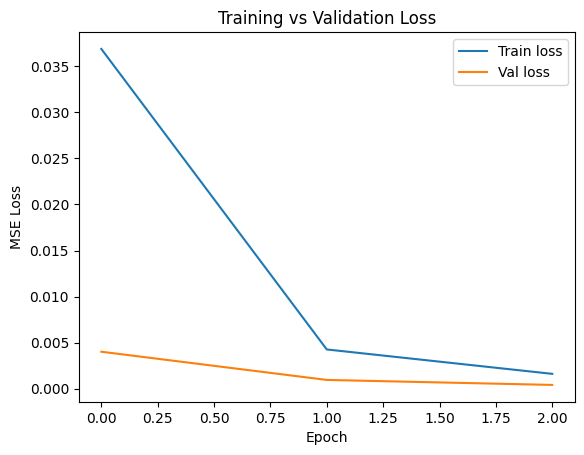

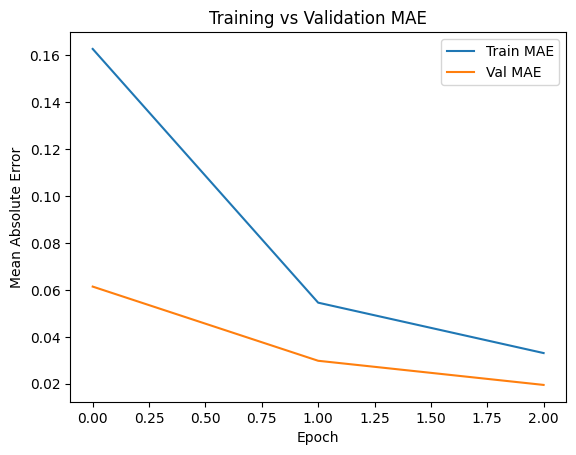

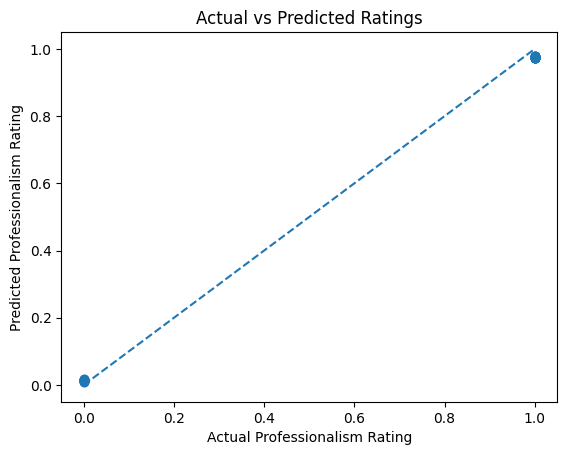

In [12]:
import matplotlib.pyplot as plt

hist = history_ft.history

# 1. Training & Validation Loss over Epochs
plt.figure()
plt.plot(hist['loss'],     label='Train loss')
plt.plot(hist['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# 2. Training & Validation MAE over Epochs
plt.figure()
plt.plot(hist['mae'],       label='Train MAE')
plt.plot(hist['val_mae'],   label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training vs Validation MAE')
plt.legend()
plt.show()

# 3. Actual vs Predicted Scatter
plt.figure()
plt.scatter(y_val, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')  # reference line
plt.xlabel('Actual Professionalism Rating')
plt.ylabel('Predicted Professionalism Rating')
plt.title('Actual vs Predicted Ratings')
plt.show()